# TASK-2 Predicition using Desicion Algorithm
AUTHOR:- VISHAL KUMAR JHA

# Importing required libraries and datasets

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix
%matplotlib inline

# Load Iris data and show head

In [4]:
data = pd.read_csv("Downloads/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.shape

(150, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [8]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
data['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [11]:
setosa = data[data['Species'] == 'Iris-setosa']
versicolor = data[data['Species'] == 'Iris-versicolor']
virginica = data[data['Species'] == 'Iris-virginica']

In [13]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [14]:
data.drop(columns=["Id"],axis=1, inplace=True)

# Data Visualization

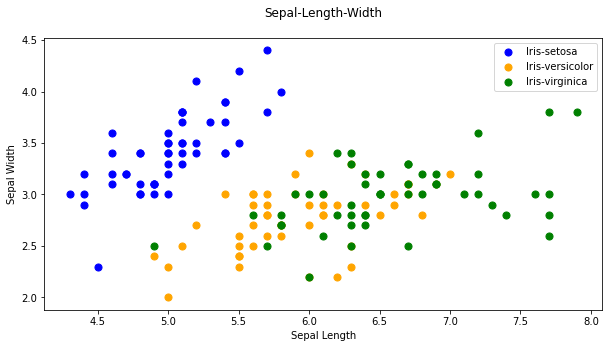

In [15]:
sepal = setosa.plot(kind='scatter' , x = 'SepalLengthCm', y  = 'SepalWidthCm', 
                    color = 'blue', label= 'Iris-setosa', s=50)
versicolor.plot(kind='scatter' , x = 'SepalLengthCm', y  = 'SepalWidthCm', 
                    color = 'orange', label = 'Iris-versicolor', ax = sepal, s = 50)
virginica.plot(kind='scatter' , x = 'SepalLengthCm', y  = 'SepalWidthCm', 
                    color = 'green', label = 'Iris-virginica', ax = sepal, s = 50)

sepal.set_xlabel('Sepal Length')
sepal.set_ylabel('Sepal Width')
sepal.set_title('Sepal-Length-Width\n')
sepal = plt.gcf()
sepal.set_size_inches(10, 5)
plt.show()

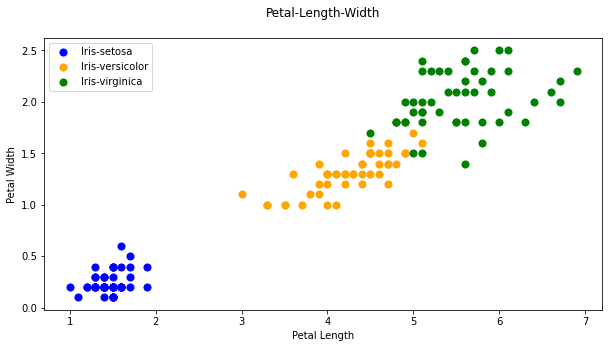

In [16]:
petal = setosa.plot(kind='scatter' , x = 'PetalLengthCm', y  = 'PetalWidthCm', 
                    color = 'blue', label= 'Iris-setosa', s=50)
versicolor.plot(kind='scatter' , x = 'PetalLengthCm', y  = 'PetalWidthCm', 
                    color = 'orange', label = 'Iris-versicolor', ax = petal, s = 50)
virginica.plot(kind='scatter' , x = 'PetalLengthCm', y  = 'PetalWidthCm', 
                    color = 'green', label = 'Iris-virginica', ax = petal, s = 50)

petal.set_xlabel('Petal Length')
petal.set_ylabel('Petal Width')
petal.set_title('Petal-Length-Width\n')
petal = plt.gcf()
petal.set_size_inches(10, 5)
plt.show()

In [18]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

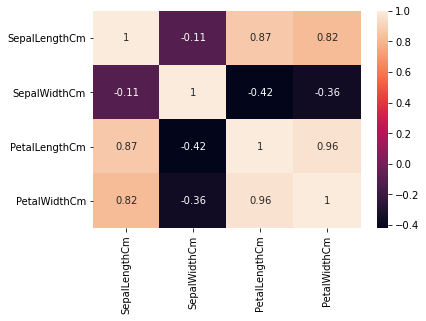

In [19]:
sns.heatmap(data.corr(),annot= True)

# Training the model

In [20]:
X_all = data.iloc[:,:4]
Y_all = data.iloc[:,4] 
print(X_all)
print("\n\n",Y_all)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Ir

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size=0.3,random_state=0)
print(X_train.shape)
print(X_test.shape)

(105, 4)
(45, 4)


In [22]:
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

# Testing Model

In [23]:
Y_pred = model.predict(X_test)
print(Y_pred)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa']


# Accuracy of the model

In [24]:
print("Accuracy: ", metrics.accuracy_score(Y_test,Y_pred))
metrics.confusion_matrix(Y_test,Y_pred)

Accuracy:  0.9777777777777777


array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

# Tree Plotting in Decision Tree

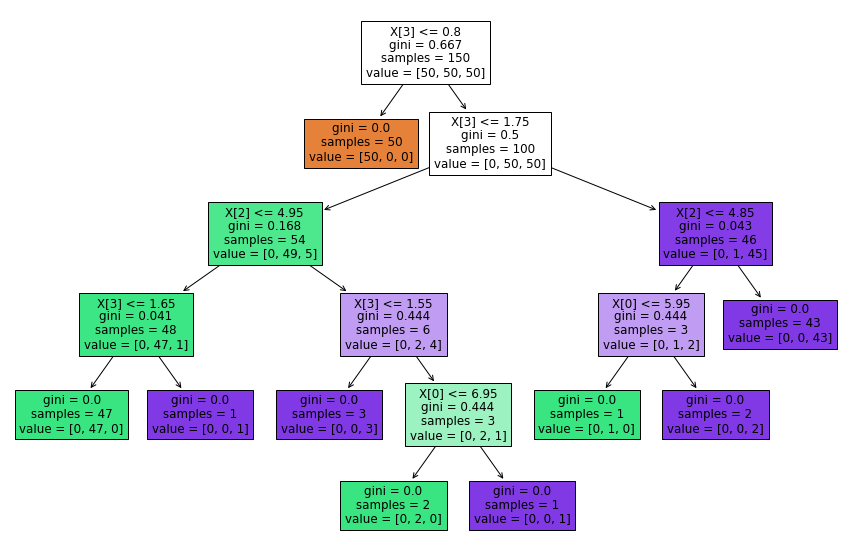

In [25]:
from sklearn import tree
model_all_params = DecisionTreeClassifier().fit(X_all,Y_all)
plt.figure(figsize = (15,10))
tree.plot_tree(model_all_params, 
          filled=True      )
plt.show()